# Modeling

In [5]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from imblearn.metrics import classification_report_imbalanced

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
df_training = pickle.load(open('my_df_training_onehot.pickle', 'rb'))
y = pickle.load(open('my_y.pickle', 'rb'))
X_train, X_test, y_train, y_test = train_test_split(df_training, y)

In [3]:
def Summary_Results(estimator,X_test,y_test):
    ypred = estimator.predict(X_test)
    print('The accuracy is: %.2f3 \n' % accuracy_score(ypred,y_test))
    print('Confusion_matrix:')
    cm = confusion_matrix(y_test, ypred)
    print('\t\t pridicted values')
    print('\t\t 0 \t 1')
    print('actual 0: ','\t',cm[0,0],'\t',cm[0,1])
    print('values 1: ','\t',cm[1,0],'\t',cm[1,1])
    print('-------------------------------------------------------')
    print('Classification_report: \n')
    print(classification_report(y_test,ypred,target_names=["class 0","class 1"]))

In [7]:
estimators = {'RandomForest':RandomForestClassifier(),'AdaBoost': AdaBoostClassifier(), 'Extra Tree': ExtraTreesClassifier()}
clfs = defaultdict(str)

for name,clf in estimators.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(name + '_clf')
    print(classification_report_imbalanced(y_test, y_pred))
    clfs[name+'_clf'] = clf

Extra Tree_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.99      0.05      0.93      0.54      0.31     16015
          1       0.33      0.05      0.99      0.09      0.54      0.28      2231

avg / total       0.81      0.87      0.16      0.83      0.54      0.31     18246

RandomForest_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.99      0.03      0.93      0.56      0.34     16015
          1       0.36      0.03      0.99      0.06      0.56      0.30      2231

avg / total       0.82      0.87      0.15      0.83      0.56      0.33     18246

AdaBoost_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      1.00      0.01      0.94      0.74      0.56     16015
          1       0.62      0.01      1.00      0.03      0.74      0.53      2231

avg / total       0.85      0.88  

In [14]:
# oversample
from imblearn.over_sampling import SMOTE
sme = SMOTE()
X_resampled, y_resampled = sme.fit_sample(X_train, y_train)
for name,clf in estimators.items():
    clf.fit(X_resampled,y_resampled)
    y_pred = clf.predict(X_test)
    print(name + '_clf')
    print(classification_report_imbalanced(y_test, y_pred))
    clfs[name+'_SMOTEENN_clf'] = clf

Extra Tree_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.97      0.09      0.93      0.52      0.28     16015
          1       0.30      0.09      0.97      0.14      0.52      0.25      2231

avg / total       0.81      0.86      0.20      0.83      0.52      0.28     18246

RandomForest_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.97      0.11      0.93      0.54      0.31     16015
          1       0.33      0.11      0.97      0.16      0.54      0.27      2231

avg / total       0.82      0.86      0.21      0.83      0.54      0.30     18246

AdaBoost_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.91      0.21      0.90      0.47      0.23     16015
          1       0.24      0.21      0.91      0.23      0.47      0.20      2231

avg / total       0.81      0.82  

In [8]:
# combine
from imblearn.combine import SMOTEENN
sme = SMOTEENN()
X_resampled, y_resampled = sme.fit_sample(X_train, y_train)
for name,clf in estimators.items():
    clf.fit(X_resampled,y_resampled)
    y_pred = clf.predict(X_test)
    print(name + '_clf')
    print(classification_report_imbalanced(y_test, y_pred))
    clfs[name+'_SMOTEENN_clf'] = clf

Extra Tree_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.80      0.43      0.85      0.46      0.22     16015
          1       0.23      0.43      0.80      0.30      0.46      0.20      2231

avg / total       0.83      0.75      0.48      0.78      0.46      0.22     18246

RandomForest_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.79      0.44      0.85      0.46      0.22     16015
          1       0.23      0.44      0.79      0.30      0.46      0.19      2231

avg / total       0.83      0.75      0.48      0.78      0.46      0.22     18246

AdaBoost_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.62      0.61      0.74      0.41      0.18     16015
          1       0.18      0.61      0.62      0.28      0.41      0.16      2231

avg / total       0.83      0.62  

In [10]:
# combine
from imblearn.combine import SMOTETomek
sme = SMOTETomek()
X_resampled, y_resampled = sme.fit_sample(X_train, y_train)
for name,clf in estimators.items():
    clf.fit(X_resampled,y_resampled)
    y_pred = clf.predict(X_test)
    print(name + '_clf')
    print(classification_report_imbalanced(y_test, y_pred))
    clfs[name+'_SMOTETomek_clf'] = clf

Extra Tree_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.97      0.08      0.93      0.51      0.27     16015
          1       0.29      0.08      0.97      0.13      0.51      0.24      2231

avg / total       0.81      0.86      0.19      0.83      0.51      0.27     18246

RandomForest_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.97      0.08      0.93      0.50      0.26     16015
          1       0.28      0.08      0.97      0.12      0.50      0.23      2231

avg / total       0.81      0.86      0.19      0.83      0.50      0.26     18246

AdaBoost_clf
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.91      0.23      0.90      0.48      0.24     16015
          1       0.25      0.23      0.91      0.24      0.48      0.21      2231

avg / total       0.82      0.82  

In [11]:
for name,clf in clfs.items():
    print(name+':')
    Summary_Results(clfs[name],X_test.as_matrix(),y_test.as_matrix())
    print('================================================================')

RandomForest_SMOTEENN_clf:
The accuracy is: 0.863 

Confusion_matrix:
		 pridicted values
		 0 	 1
actual 0:  	 15560 	 455
values 1:  	 2056 	 175
-------------------------------------------------------
Classification_report: 

             precision    recall  f1-score   support

    class 0       0.88      0.97      0.93     16015
    class 1       0.28      0.08      0.12      2231

avg / total       0.81      0.86      0.83     18246

Extra Tree_clf:
The accuracy is: 0.863 

Confusion_matrix:
		 pridicted values
		 0 	 1
actual 0:  	 15555 	 460
values 1:  	 2043 	 188
-------------------------------------------------------
Classification_report: 

             precision    recall  f1-score   support

    class 0       0.88      0.97      0.93     16015
    class 1       0.29      0.08      0.13      2231

avg / total       0.81      0.86      0.83     18246

AdaBoost_SMOTETomek_clf:
The accuracy is: 0.823 

Confusion_matrix:
		 pridicted values
		 0 	 1
actual 0:  	 14533 	 1482


## SVM

In [3]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN()
X_train, y_train = sme.fit_sample(X_train, y_train)

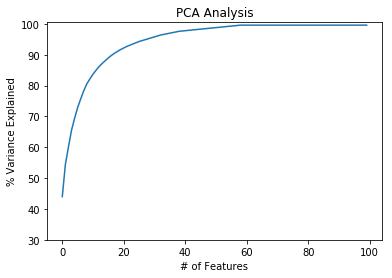

In [ ]:
# find the n_compoents
covar_matrix = PCA(n_components = 100)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [6]:
n_components = 51

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {'C': [1e3],
              'gamma': [0.01] }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.75      0.82     16015
          1       0.20      0.46      0.28      2231

avg / total       0.82      0.71      0.75     18246

[[11982  4033]
 [ 1203  1028]]
